In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [213]:
fraud = pd.read_csv('Documents/DATA ANAYSIS FOLDER/creditcard.csv')
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [214]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [215]:
fraud.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [216]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [217]:
fraud.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [218]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [219]:
fraud.value_counts('Class')

Class
0    284315
1       492
Name: count, dtype: int64

Clearly we can see imbalnce between the fraudulent and non fradulent transcations we have balance them

In [220]:
non_fradulent =  fraud[fraud['Class']==0]
fradulent =  fraud[fraud['Class']==1]
print(fradulent)
print(non_fradulent)

            Time        V1        V2        V3        V4        V5        V6  \
541        406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623        472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920      4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108      6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329      7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [221]:
non_fradulent =  non_fradulent.sample(n=492)
non_fradulent

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
206823,136388.0,1.936295,-0.422907,-2.111347,0.519727,2.300886,4.069956,-0.673034,0.998663,0.970041,...,-0.339145,-0.702863,0.271756,0.667685,0.093255,-0.798584,0.057576,-0.049480,10.00,0
99705,67246.0,-0.444166,0.273678,1.027770,-0.343063,-0.389623,-0.850603,1.095180,-0.316148,-0.657028,...,0.305575,0.699019,0.194108,0.529340,-0.460610,1.513833,-0.004029,0.151314,150.00,0
210479,138003.0,-0.094726,0.026748,0.496783,0.336195,1.728865,2.243263,0.168242,0.573400,0.625094,...,-0.344246,-0.582658,0.262437,-2.511475,-1.578493,-1.096558,0.206243,0.032848,11.60,0
125456,77680.0,1.184461,-0.955126,1.075620,-0.434447,-1.597537,-0.436522,-0.946583,-0.085347,-0.294137,...,0.376254,1.017123,-0.197072,0.488867,0.465698,-0.060563,0.040979,0.043995,100.00,0
254410,156720.0,2.047172,0.538560,-2.380370,0.787552,0.460363,-1.834748,0.328526,-0.372014,0.614713,...,0.089910,0.428789,-0.037943,-0.187515,0.232850,-0.100813,0.015504,0.006412,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235180,148284.0,1.980029,-1.086497,-0.437444,-0.311596,-1.254555,-0.668608,-0.777734,-0.120912,0.027456,...,-0.592796,-1.320970,0.444156,-0.171314,-0.777870,0.234412,-0.030037,-0.027828,83.89,0
17335,28637.0,-1.307606,2.310460,-0.994213,0.819005,-0.524381,-0.992485,-0.134509,1.131760,-1.053332,...,0.263423,0.723743,0.174051,0.360514,-0.534595,-0.419483,0.276134,0.156539,0.89,0
283750,171844.0,2.028451,-0.737391,-2.760790,-0.437472,2.209134,3.460913,-0.543472,0.724211,-0.944170,...,-0.452108,-0.908786,0.245853,0.623516,0.062690,-0.717038,0.033695,-0.043936,54.51,0
228682,145608.0,-0.807996,1.623454,-1.340293,-0.687875,0.444360,-0.481183,0.146846,0.910683,-0.446205,...,-0.254971,-0.813980,0.153467,0.246350,-0.313794,0.121332,0.084925,-0.006979,9.28,0


In [222]:
fraud = pd.concat([non_fradulent,fradulent],axis =0)
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
206823,136388.0,1.936295,-0.422907,-2.111347,0.519727,2.300886,4.069956,-0.673034,0.998663,0.970041,...,-0.339145,-0.702863,0.271756,0.667685,0.093255,-0.798584,0.057576,-0.049480,10.00,0
99705,67246.0,-0.444166,0.273678,1.027770,-0.343063,-0.389623,-0.850603,1.095180,-0.316148,-0.657028,...,0.305575,0.699019,0.194108,0.529340,-0.460610,1.513833,-0.004029,0.151314,150.00,0
210479,138003.0,-0.094726,0.026748,0.496783,0.336195,1.728865,2.243263,0.168242,0.573400,0.625094,...,-0.344246,-0.582658,0.262437,-2.511475,-1.578493,-1.096558,0.206243,0.032848,11.60,0
125456,77680.0,1.184461,-0.955126,1.075620,-0.434447,-1.597537,-0.436522,-0.946583,-0.085347,-0.294137,...,0.376254,1.017123,-0.197072,0.488867,0.465698,-0.060563,0.040979,0.043995,100.00,0
254410,156720.0,2.047172,0.538560,-2.380370,0.787552,0.460363,-1.834748,0.328526,-0.372014,0.614713,...,0.089910,0.428789,-0.037943,-0.187515,0.232850,-0.100813,0.015504,0.006412,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [223]:
fraud.value_counts('Class')

Class
0    492
1    492
Name: count, dtype: int64

### Data Visulaztion

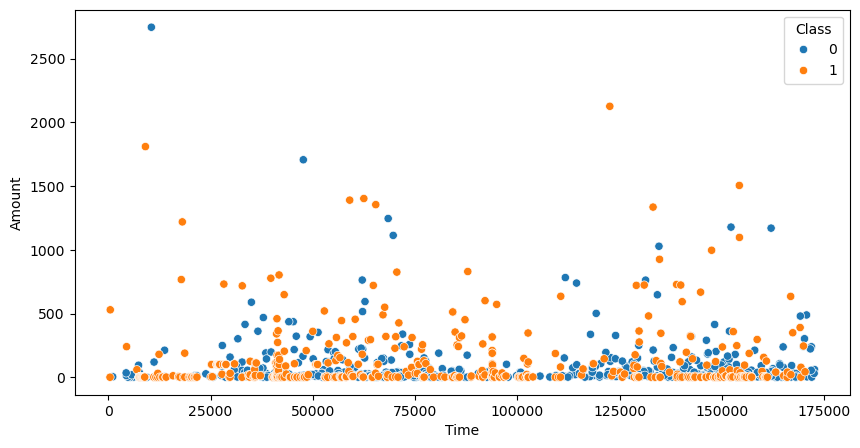

In [224]:
plt.figure(figsize =(10,5))
sns.scatterplot(x='Time',y='Amount',hue ='Class',data =fraud)
plt.show()


In [225]:
correlation = fraud.corr()
correlation

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.252254,-0.223454,0.160815,-0.224077,0.301844,0.134228,0.229976,-0.144203,0.170258,...,-0.058573,0.100368,0.064133,-0.030876,-0.152548,-0.045507,-0.128009,-0.008182,-0.004339,-0.167837
V1,0.252254,1.000000,-0.807911,0.877420,-0.608027,0.866573,0.319297,0.882439,-0.083634,0.645261,...,0.015274,-0.046534,-0.055325,-0.084102,-0.090081,0.056255,0.187224,0.183132,-0.020334,-0.426801
V2,-0.223454,-0.807911,1.000000,-0.858428,0.683221,-0.799265,-0.270870,-0.847027,-0.019950,-0.685820,...,0.044549,-0.019898,0.128790,0.023182,0.107704,0.008299,-0.166890,-0.003930,-0.237195,0.482668
V3,0.160815,0.877420,-0.858428,1.000000,-0.770606,0.855608,0.463002,0.888755,-0.174640,0.758178,...,0.028669,-0.061972,-0.026149,-0.006137,-0.094883,-0.023263,0.099802,0.137755,-0.003925,-0.566267
V4,-0.224077,-0.608027,0.683221,-0.770606,1.000000,-0.583900,-0.425888,-0.713264,0.102356,-0.785364,...,-0.022892,0.119527,0.011743,-0.045301,-0.039344,0.146556,-0.011223,-0.087041,-0.009533,0.711601
V5,0.301844,0.866573,-0.799265,0.855608,-0.583900,1.000000,0.300708,0.843525,-0.211098,0.658085,...,0.041229,-0.089923,-0.073269,-0.150543,-0.092497,0.062244,0.187079,0.178960,-0.106505,-0.377602
V6,0.134228,0.319297,-0.270870,0.463002,-0.425888,0.300708,1.000000,0.278944,-0.578515,0.357535,...,0.030378,-0.008697,0.325592,-0.045501,-0.138085,-0.041907,-0.166632,-0.031279,0.147788,-0.396900
V7,0.229976,0.882439,-0.847027,0.888755,-0.713264,0.843525,0.278944,1.000000,0.083208,0.759125,...,0.036653,-0.115781,-0.081676,-0.056335,0.052217,0.020502,0.230718,0.162340,0.130110,-0.478261
V8,-0.144203,-0.083634,-0.019950,-0.174640,0.102356,-0.211098,-0.578515,0.083208,1.000000,-0.074073,...,-0.123678,0.045607,-0.427378,0.084380,0.225682,0.048735,0.282323,-0.020493,0.026168,0.062792
V9,0.170258,0.645261,-0.685820,0.758178,-0.785364,0.658085,0.357535,0.759125,-0.074073,1.000000,...,0.145999,-0.241514,-0.031546,0.000339,-0.014167,-0.143735,0.128405,0.163690,0.010481,-0.553087


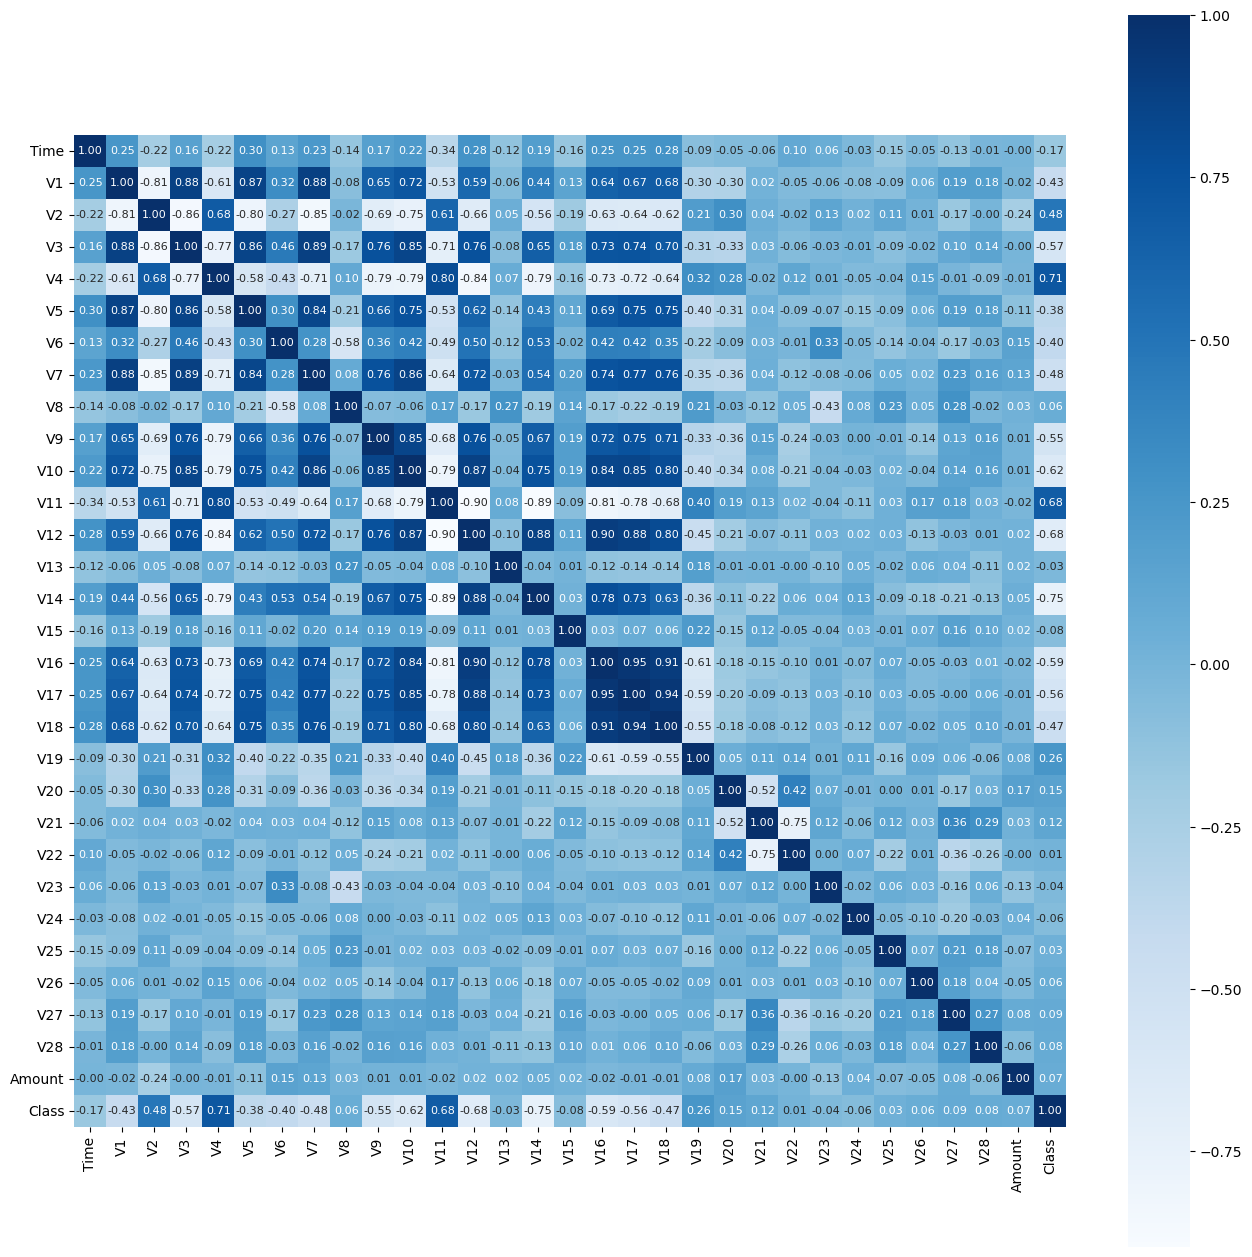

In [226]:
plt.figure(figsize = (16,16))
sns.heatmap(correlation ,cmap='Blues',fmt='.2f',cbar=True,square= True,annot =True,annot_kws={'size' :8})
plt.show()

### Standard Scaler

In [227]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
206823,136388.0,1.936295,-0.422907,-2.111347,0.519727,2.300886,4.069956,-0.673034,0.998663,0.970041,...,-0.339145,-0.702863,0.271756,0.667685,0.093255,-0.798584,0.057576,-0.049480,10.00,0
99705,67246.0,-0.444166,0.273678,1.027770,-0.343063,-0.389623,-0.850603,1.095180,-0.316148,-0.657028,...,0.305575,0.699019,0.194108,0.529340,-0.460610,1.513833,-0.004029,0.151314,150.00,0
210479,138003.0,-0.094726,0.026748,0.496783,0.336195,1.728865,2.243263,0.168242,0.573400,0.625094,...,-0.344246,-0.582658,0.262437,-2.511475,-1.578493,-1.096558,0.206243,0.032848,11.60,0
125456,77680.0,1.184461,-0.955126,1.075620,-0.434447,-1.597537,-0.436522,-0.946583,-0.085347,-0.294137,...,0.376254,1.017123,-0.197072,0.488867,0.465698,-0.060563,0.040979,0.043995,100.00,0
254410,156720.0,2.047172,0.538560,-2.380370,0.787552,0.460363,-1.834748,0.328526,-0.372014,0.614713,...,0.089910,0.428789,-0.037943,-0.187515,0.232850,-0.100813,0.015504,0.006412,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [228]:
X  = fraud.drop(columns = 'Class')
Y = fraud['Class']
print(X)
print(Y)

            Time        V1        V2        V3        V4        V5        V6  \
206823  136388.0  1.936295 -0.422907 -2.111347  0.519727  2.300886  4.069956   
99705    67246.0 -0.444166  0.273678  1.027770 -0.343063 -0.389623 -0.850603   
210479  138003.0 -0.094726  0.026748  0.496783  0.336195  1.728865  2.243263   
125456   77680.0  1.184461 -0.955126  1.075620 -0.434447 -1.597537 -0.436522   
254410  156720.0  2.047172  0.538560 -2.380370  0.787552  0.460363 -1.834748   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [229]:
scaler = StandardScaler()
standarized = scaler.fit_transform(X)
X = standarized
X

array([[ 0.9797345 ,  0.79233018, -0.61456201, ..., -0.02502451,
        -0.2171106 , -0.40497016],
       [-0.44628402,  0.35971387, -0.42568795, ..., -0.08540603,
         0.25730523,  0.1874455 ],
       [ 1.01304305,  0.42321976, -0.49264133, ...,  0.12068892,
        -0.0225951 , -0.39819969],
       ...,
       [ 1.65957958,  0.3175553 , -0.19448749, ...,  0.29599913,
         0.35901394, -0.11769088],
       [ 1.67226364, -0.12546138, -0.34104078, ...,  0.78583745,
        -0.69962197,  0.58944184],
       [ 1.6801422 ,  0.80244946, -0.45692411, ..., -0.07852849,
        -0.1363742 , -0.26731815]])

### Spillting of the data

In [230]:
X_train ,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.2,stratify =Y,random_state = 3)

In [231]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


### Model fitting and Model Evaluation

In [232]:
model =SVC()
model.fit(X_train,Y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [233]:
# MODEL EVALUATION
train_prediction = model.predict(X_train)
train_accuracy_score = accuracy_score(train_prediction,Y_train)
train_accuracy_score

0.9479034307496823

In [234]:
# MODEL EVALUATION
test_prediction = model.predict(X_test)
test_accuracy_score = accuracy_score(test_prediction,Y_test)
test_accuracy_score

0.9238578680203046

### LogisticRegression

In [235]:
from sklearn.linear_model import LogisticRegression

In [236]:
model1 = LogisticRegression()
model1.fit(X_train,Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [237]:
# MODEL EVALUATION
train_prediction = model1.predict(X_train)
train_accuracy_score = accuracy_score(train_prediction,Y_train)
train_accuracy_score

0.9529860228716646

In [238]:
# MODEL EVALUATION
test_prediction = model1.predict(X_test)
test_accuracy_score = accuracy_score(test_prediction,Y_test)
test_accuracy_score

0.9289340101522843

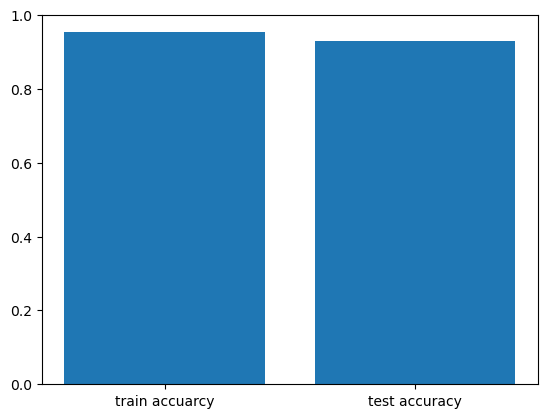

In [239]:
plt.bar(['train accuarcy','test accuracy'],[train_accuracy_score,test_accuracy_score])
plt.show()

### RandomForestClassifier

In [240]:
from sklearn.ensemble import RandomForestClassifier

In [241]:
model2 =  RandomForestClassifier()
model2.fit(X_train,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [242]:
# MODEL EVALUATION
train_prediction = model2.predict(X_train)
train_accuracy_score = accuracy_score(train_prediction,Y_train)
train_accuracy_score

1.0

In [243]:
# MODEL EVALUATION
test_prediction = model2.predict(X_test)
test_accuracy_score = accuracy_score(test_prediction,Y_test)
test_accuracy_score

0.9238578680203046

### Hyper parameter tunning

In [244]:
model_1= SVC()


In [245]:
parameters = {
    'kernel':['linear','sigmoid','poly','rbc'],
    'C':[1,5,10,15]
}

In [246]:
classifier = RandomizedSearchCV(model_1,parameters,cv=5)
classifier.fit(X,Y)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 469, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sk

,estimator,SVC()
,param_distributions,"{'C': [1, 5, ...], 'kernel': ['linear', 'sigmoid', ...]}"
,n_iter,10
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [247]:
classifier.cv_results_

{'mean_fit_time': array([0.0214642 , 0.00951338, 0.01427951, 0.07994194, 0.01911964,
        0.01733041, 0.06679926, 0.01728883, 0.01271353, 0.00040007]),
 'std_fit_time': array([0.00807971, 0.00054608, 0.00556663, 0.01598158, 0.00168064,
        0.00152925, 0.017911  , 0.00106196, 0.00130573, 0.00048998]),
 'mean_score_time': array([0.00454741, 0.00239944, 0.00239859, 0.00547419, 0.00487995,
        0.00275154, 0.00194049, 0.00501647, 0.00379457, 0.        ]),
 'std_score_time': array([0.00251042, 0.00119972, 0.00195844, 0.00596008, 0.00087426,
        0.00057542, 0.00172511, 0.0012787 , 0.00070811, 0.        ]),
 'param_kernel': masked_array(data=['poly', 'sigmoid', 'poly', 'linear', 'poly', 'linear',
                    'linear', 'poly', 'sigmoid', 'rbc'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_C': masked_array(data=[1, 10, 10, 15, 5, 1, 10, 15, 1, 15],

In [248]:
best_parameters = classifier.best_params_
best_parameters 

{'kernel': 'linear', 'C': 1}

In [249]:
best_score = classifier.best_score_
best_score 

0.9400238267895992

In [250]:
Result = pd.DataFrame(classifier.cv_results_)
Result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.021464,0.008080,0.004547,0.002510,poly,1,"{'kernel': 'poly', 'C': 1}",0.928934,0.837563,0.741117,0.908629,0.744898,0.832228,0.078925,9
1,0.009513,0.000546,0.002399,0.001200,sigmoid,10,"{'kernel': 'sigmoid', 'C': 10}",0.939086,0.908629,0.908629,0.928934,0.903061,0.917668,0.013874,8
2,0.014280,0.005567,0.002399,0.001958,poly,10,"{'kernel': 'poly', 'C': 10}",0.944162,0.928934,0.913706,0.949239,0.913265,0.929861,0.014949,2
3,0.079942,0.015982,0.005474,0.005960,linear,15,"{'kernel': 'linear', 'C': 15}",0.903553,0.934010,0.923858,0.949239,0.923469,0.926826,0.014937,4
4,0.019120,0.001681,0.004880,0.000874,poly,5,"{'kernel': 'poly', 'C': 5}",0.944162,0.923858,0.898477,0.949239,0.897959,0.922739,0.021749,6
5,0.017330,0.001529,0.002752,0.000575,linear,1,"{'kernel': 'linear', 'C': 1}",0.959391,0.939086,0.928934,0.949239,0.923469,0.940024,0.013099,1
6,0.066799,0.017911,0.001940,0.001725,linear,10,"{'kernel': 'linear', 'C': 10}",0.908629,0.934010,0.923858,0.949239,0.923469,0.927841,0.013416,3
7,0.017289,0.001062,0.005016,0.001279,poly,15,"{'kernel': 'poly', 'C': 15}",0.944162,0.934010,0.908629,0.934010,0.913265,0.926815,0.013556,5
8,0.012714,0.001306,0.003795,0.000708,sigmoid,1,"{'kernel': 'sigmoid', 'C': 1}",0.954315,0.893401,0.888325,0.954315,0.903061,0.918683,0.029476,7
9,0.000400,0.000490,0.000000,0.000000,rbc,15,"{'kernel': 'rbc', 'C': 15}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [251]:
model_2= LogisticRegression()

In [252]:
parameters  = {
    'C':[1,5,10,25]
}

In [253]:
classifier2  = RandomizedSearchCV(model_2,parameters,cv=10)
classifier2.fit(X,Y)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,estimator,LogisticRegression()
,param_distributions,"{'C': [1, 5, ...]}"
,n_iter,10
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [254]:
classifier2.cv_results_

{'mean_fit_time': array([0.01503782, 0.01829536, 0.01874917, 0.02656183]),
 'std_fit_time': array([0.00582185, 0.00689023, 0.00624911, 0.00715968]),
 'mean_score_time': array([0.00189867, 0.00176191, 0.        , 0.00156238]),
 'std_score_time': array([0.0006993 , 0.00465793, 0.        , 0.00468714]),
 'param_C': masked_array(data=[1, 5, 10, 25],
              mask=[False, False, False, False],
        fill_value=999999),
 'params': [{'C': 1}, {'C': 5}, {'C': 10}, {'C': 25}],
 'split0_test_score': array([0.95959596, 0.95959596, 0.95959596, 0.95959596]),
 'split1_test_score': array([0.95959596, 0.88888889, 0.83838384, 0.82828283]),
 'split2_test_score': array([0.98989899, 0.97979798, 0.97979798, 0.97979798]),
 'split3_test_score': array([0.87878788, 0.8989899 , 0.8989899 , 0.88888889]),
 'split4_test_score': array([0.89795918, 0.89795918, 0.89795918, 0.89795918]),
 'split5_test_score': array([0.96938776, 0.95918367, 0.95918367, 0.95918367]),
 'split6_test_score': array([0.96938776, 0.969

In [255]:
best_parameters = classifier2.best_params_
best_parameters

{'C': 1}

In [256]:
best_score = classifier2.best_score_
best_score

0.9400123685837972

In [257]:
from sklearn.model_selection import GridSearchCV

In [258]:
model_1= SVC()

In [259]:
parameters = {
    'kernel':['linear','sigmoid','poly','rbc'],
    'C':[1,5,10,15]
}

In [260]:
classifier3 = GridSearchCV(model_1,parameters,cv=5)
classifier3.fit(X,Y)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 469, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Admin\anaconda3\Lib\site-packages\

,estimator,SVC()
,param_grid,"{'C': [1, 5, ...], 'kernel': ['linear', 'sigmoid', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [261]:
classifier3.cv_results_

{'mean_fit_time': array([0.02143154, 0.0132575 , 0.02008991, 0.00079927, 0.02318473,
        0.00937362, 0.01874981, 0.        , 0.0655921 , 0.01136413,
        0.01591043, 0.00065937, 0.07586064, 0.01056519, 0.01421156,
        0.        ]),
 'std_fit_time': array([0.00434523, 0.00159506, 0.00255148, 0.00039964, 0.00700575,
        0.00765353, 0.00624771, 0.        , 0.01868675, 0.00155974,
        0.00097952, 0.00042692, 0.0094011 , 0.00162979, 0.00282903,
        0.        ]),
 'mean_score_time': array([0.00249119, 0.00397   , 0.00799556, 0.        , 0.00625033,
        0.        , 0.00312452, 0.        , 0.00120082, 0.00269918,
        0.00445986, 0.        , 0.00472331, 0.00264611, 0.00312448,
        0.        ]),
 'std_score_time': array([0.00090161, 0.00084777, 0.00395411, 0.        , 0.00765506,
        0.        , 0.00624905, 0.        , 0.0014707 , 0.00060108,
        0.00115975, 0.        , 0.00555891, 0.00071978, 0.00624895,
        0.        ]),
 'param_C': masked_array(d

In [262]:
best_parameters = classifier3.best_params_
best_parameters

{'C': 1, 'kernel': 'linear'}

In [263]:
best_score = classifier3.best_score_
best_score 

0.9400238267895992

### Model Prediction

In [270]:
input_data =([74159,	-1.548788099,	1.80869795	,-0.953509034,	2.213085393,	-2.015727792,	-0.913456845,	-2.356012983,	1.197168967,	-1.678374057	,-3.538650232,	3.102089927	,-3.993373054	,-1.937410623,	-3.822894106,	0.830970111	,-2.475358854,	-5.211875168,	-0.413871678,	0.933262165	,0.390785964	,0.855138263,	0.774744821	,0.059037152,	0.343199808	,-0.468937929	,-0.278337987,	0.625922215,	0.395573378,	76.94])

input_data_asarray = np.asarray(input_data)
input_data_reshape = input_data_asarray.reshape(1,-1)
input_data_scaler = scaler.transform(input_data_reshape)
prediction = model.predict(input_data_scaler)
if(prediction[0] ==0):
    print("The Customer is not Fradulent")
else:
    print("The Customer is Fradulent")

The Customer is Fradulent


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
